In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from astropy.io import fits

from tqdm import tqdm


In [2]:
cat = fits.getdata('/mnt/g/data/PhD Projects/SR/sim_catalogs/SIDES_mips_scuba_spire.fits')
cat = pd.DataFrame(cat)

# Convert all columns to little-endian format
cat = cat.astype('<f8')

In [3]:
cat.columns

Index(['redshift', 'ra', 'dec', 'Mhalo', 'Mstar', 'qflag', 'SFR', 'issb', 'mu',
       'Dlum', 'Umean', 'LIR', 'S24', 'S250', 'S350', 'S500', 'LFIR',
       'SMIPS24', 'SSPIRE250', 'SSPIRE350', 'SSPIRE500', 'SSCUBA450',
       'LprimCO10', 'ICO10', 'ICO21', 'ICO32', 'ICO43', 'ICO54', 'ICO65',
       'ICO76', 'ICO87', 'LCII_Lagache', 'ICII_Lagache', 'LCII_de_Looze',
       'ICII_de_Looze', 'ICI10', 'ICI21'],
      dtype='object')

In [4]:
# Catalog cut range 500micron [2 - 100] mJy

cat_cut = cat[(cat["SSCUBA450"] >= 2e-3) & (cat["SSCUBA450"] <= 100e-3)].copy()
cat_cut2 = cat[(cat["SSCUBA450"] >= 2e-3) & (cat["SSCUBA450"] <= 50e-3)].copy()

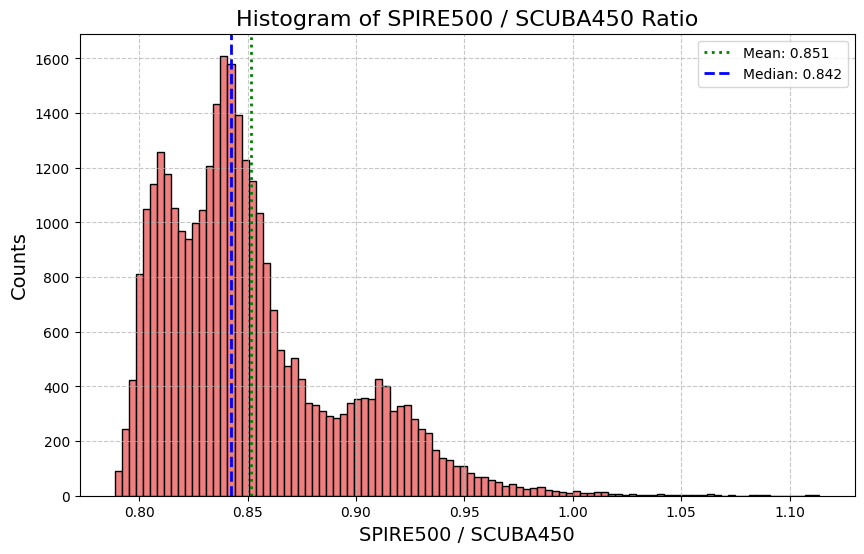

In [5]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(cat_cut["SSPIRE500"]/cat_cut["SSCUBA450"], bins=100, color='lightcoral', edgecolor='black')

# Customizing the plot
plt.ylabel("Counts", fontsize=14)
plt.xlabel("SPIRE500 / SCUBA450", fontsize=14)
plt.title("Histogram of SPIRE500 / SCUBA450 Ratio", fontsize=16)

# Calculate mean of the ratio
mean_ratio = np.mean(cat_cut["SSPIRE500"]/cat_cut["SSCUBA450"])

# Add a vertical line at the mean with label
plt.axvline(mean_ratio, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean: {mean_ratio:.3f}')

# Calculate median of the ratio
median_ratio = np.median(cat_cut["SSPIRE500"]/cat_cut["SSCUBA450"])

# Add a vertical line at the median with label
plt.axvline(median_ratio, color='blue', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_ratio:.3f}')
plt.legend()

# Enhancing the overall aesthetics
plt.grid(True, linestyle='--', alpha=0.7)

# Showing the plot
plt.show()

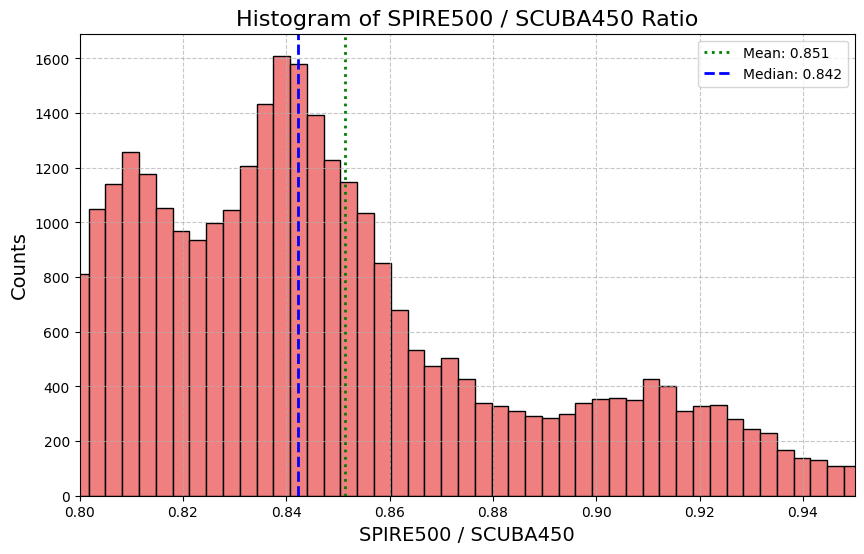

In [8]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(cat_cut2["SSPIRE500"]/cat_cut2["SSCUBA450"], bins=100, color='lightcoral', edgecolor='black')

# Customizing the plot
plt.ylabel("Counts", fontsize=14)
plt.xlabel("SPIRE500 / SCUBA450", fontsize=14)
plt.title("Histogram of SPIRE500 / SCUBA450 Ratio", fontsize=16)

# Calculate mean of the ratio
mean_ratio = np.mean(cat_cut2["SSPIRE500"]/cat_cut2["SSCUBA450"])

# Add a vertical line at the mean with label
plt.axvline(mean_ratio, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean: {mean_ratio:.3f}')

# Calculate median of the ratio
median_ratio = np.median(cat_cut2["SSPIRE500"]/cat_cut2["SSCUBA450"])

# Add a vertical line at the median with label
plt.axvline(median_ratio, color='blue', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_ratio:.3f}')
plt.legend()

# Enhancing the overall aesthetics
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim([0.8, 0.95])

# Showing the plot
plt.show()

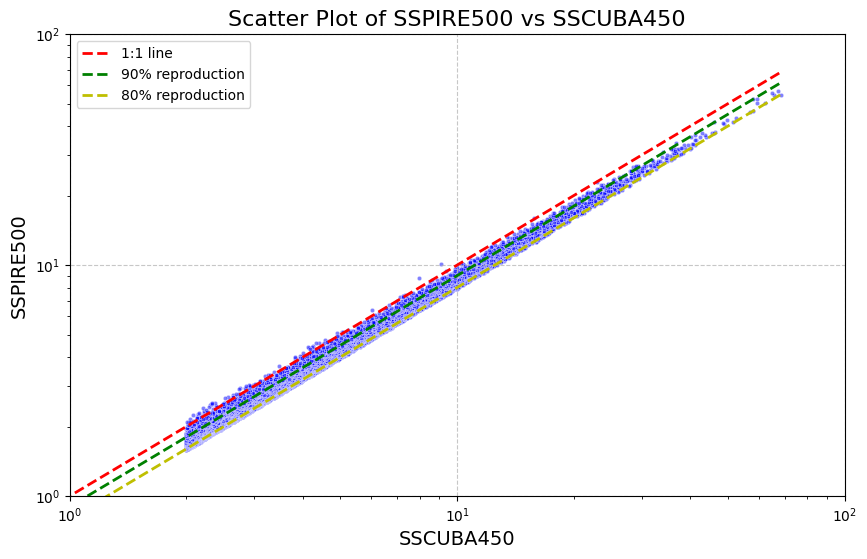

In [7]:
# Data to be plotted
y = cat_cut["SSPIRE500"]*1e3
x = cat_cut["SSCUBA450"]*1e3

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', edgecolor='w', linewidth=0.5)

# Adding the 1:1 line
max_val = max(max(x), max(y))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='1:1 line')
plt.plot([0, max_val], [0, 0.9*max_val], 'g--', linewidth=2, label='90% reproduction')
plt.plot([0, max_val], [0, 0.8*max_val], 'y--', linewidth=2, label='80% reproduction')

# Setting log scale
plt.xscale('log')
plt.yscale('log')

# Customizing the plot
plt.ylabel("SSPIRE500", fontsize=14)
plt.xlabel("SSCUBA450", fontsize=14)
plt.title("Scatter Plot of SSPIRE500 vs SSCUBA450", fontsize=16)

# limits
plt.xlim([1, 100])
plt.ylim([1, 100])
# Enhancing the overall aesthetics
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

# Showing the plot
plt.show()